导包

In [206]:
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt

声明画图所用变量

In [207]:
epochList = []
lossList = []
accuracyList = []

定义导入数据集的函数

In [208]:
class DiabetesDataset(Dataset):
    def __init__(self, filepath):
        xy = np.loadtxt(filepath, delimiter=',', dtype=np.float32)
        self.len = xy.shape[0]
        self.x_data = torch.from_numpy(xy[:, :-1])
        self.y_data = torch.from_numpy(xy[:, [-1]])

    def __getitem__(self, index):
        return self.x_data[index], self.y_data[index]

    def __len__(self):
        return self.len


创建导入数据集的类

In [209]:
dataset = DiabetesDataset('../DataSet/diabetes.csv.gz')
train_loader = DataLoader(dataset, batch_size=32, shuffle=True, num_workers=0)

定义模型

In [210]:
class Model(torch.nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.linear1 = torch.nn.Linear(8, 6)

        self.linear2 = torch.nn.Linear(6, 4)

        self.linear3 = torch.nn.Linear(4, 1)
        
        self.activate1 = torch.nn.ReLU()
        self.activate2 = torch.nn.Sigmoid()

    def forward(self, x):
        x = self.activate1(self.linear1(x))
        x = self.activate1(self.linear2(x))
        x = self.activate2(self.linear3(x))
        return x

创建模型，损失函数，优化器

In [211]:
model = Model()

criterion = torch.nn.BCELoss(reduction='mean')
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

开始训练

In [212]:
for epoch in range(50):
    for i, data in enumerate(train_loader, 0):
        # 数据读取
        inputs, labels = data

        # 前向传播
        y_pred = model(inputs)
        loss = criterion(y_pred, labels)

        # 反向传播
        optimizer.zero_grad()
        loss.backward()

        # 更新参数
        optimizer.step()

        # 保存模型
        epochList.append(epoch)
        lossList.append(loss.item())

        y_pred_labels = torch.where(y_pred >= 0.5, torch.tensor([1.0]), torch.tensor([0.0]))
        accuracy = torch.eq(y_pred_labels, labels).sum().item() / labels.size(0)
        accuracyList.append(accuracy)
        print(f"Epoch: {epoch+1}, Batch: {i+1}, Accuracy: {accuracy}")
        

Epoch: 1, Batch: 1, Accuracy: 0.78125
Epoch: 1, Batch: 2, Accuracy: 0.625
Epoch: 1, Batch: 3, Accuracy: 0.5625
Epoch: 1, Batch: 4, Accuracy: 0.65625
Epoch: 1, Batch: 5, Accuracy: 0.65625
Epoch: 1, Batch: 6, Accuracy: 0.53125
Epoch: 1, Batch: 7, Accuracy: 0.5
Epoch: 1, Batch: 8, Accuracy: 0.75
Epoch: 1, Batch: 9, Accuracy: 0.59375
Epoch: 1, Batch: 10, Accuracy: 0.65625
Epoch: 1, Batch: 11, Accuracy: 0.59375
Epoch: 1, Batch: 12, Accuracy: 0.8125
Epoch: 1, Batch: 13, Accuracy: 0.65625
Epoch: 1, Batch: 14, Accuracy: 0.71875
Epoch: 1, Batch: 15, Accuracy: 0.6875
Epoch: 1, Batch: 16, Accuracy: 0.59375
Epoch: 1, Batch: 17, Accuracy: 0.71875
Epoch: 1, Batch: 18, Accuracy: 0.5
Epoch: 1, Batch: 19, Accuracy: 0.6875
Epoch: 1, Batch: 20, Accuracy: 0.65625
Epoch: 1, Batch: 21, Accuracy: 0.71875
Epoch: 1, Batch: 22, Accuracy: 0.6875
Epoch: 1, Batch: 23, Accuracy: 0.625
Epoch: 1, Batch: 24, Accuracy: 0.7391304347826086
Epoch: 2, Batch: 1, Accuracy: 0.65625
Epoch: 2, Batch: 2, Accuracy: 0.53125
Epoch:

画图

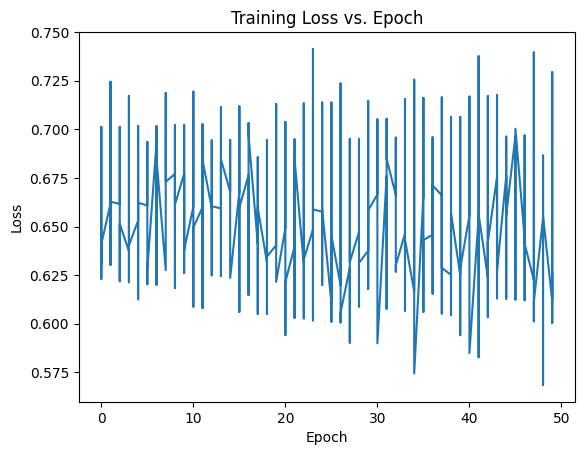

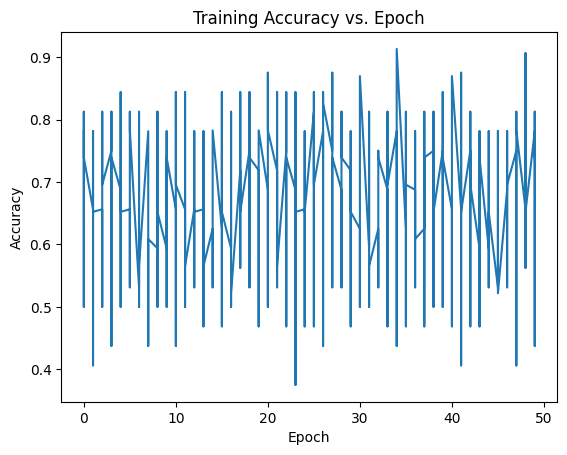

In [213]:
plt.plot(epochList, lossList)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss vs. Epoch')
plt.show()
plt.plot(epochList, accuracyList)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training Accuracy vs. Epoch')
plt.show()